In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df['Class'] = df['Class'].astype('category')

df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: category
Categories (2, int64): [0, 1]

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [6]:
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


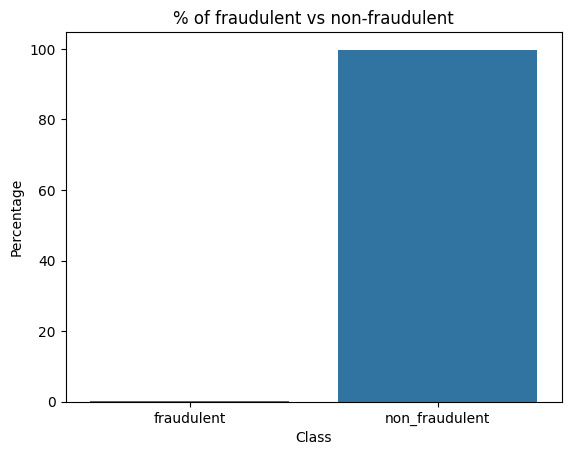

In [7]:
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')
plt.show()

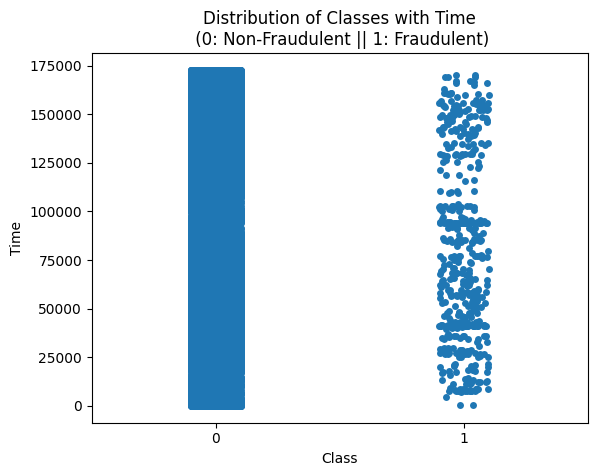

In [8]:
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

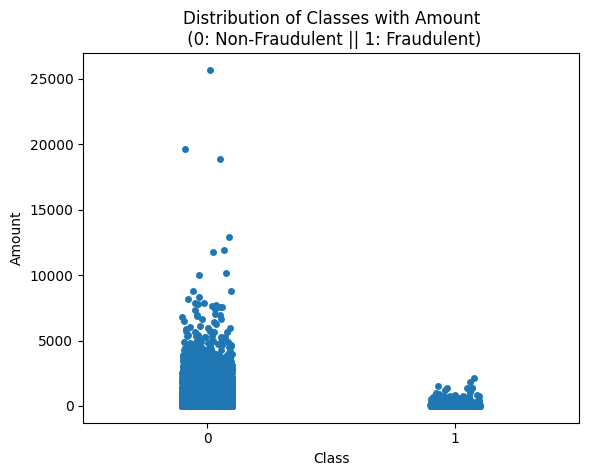

In [9]:
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

In [10]:
df=df.drop('Time',axis=1)
df.shape

(284807, 30)

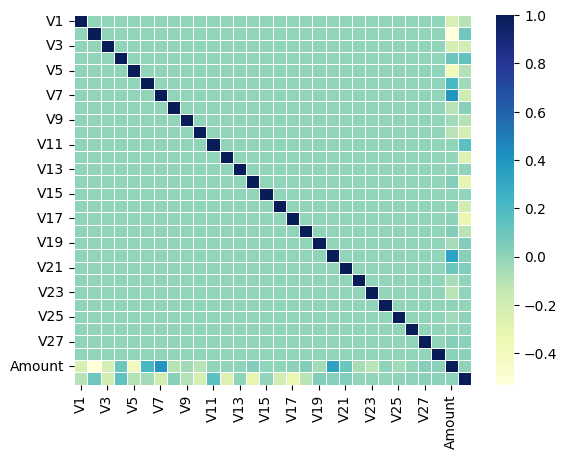

In [11]:
sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')
plt.show()

In [12]:
y= df.iloc[:,-1] #class variable
X = df.iloc[:,:-1]


In [13]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [14]:
print('Total count for each class:\n', y.value_counts())
print("\nCount of each class in train data:\n",y_train.value_counts())
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Class
0    284315
1       492
Name: count, dtype: int64

Count of each class in train data:
 Class
0    227451
1       394
Name: count, dtype: int64

Count of each class in test data:
 Class
0    56864
1       98
Name: count, dtype: int64


C:\Users\jugaa\AppData\Local\Temp\ipykernel_17800\4258001306.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
C:\Users\jugaa\AppData\Local\Temp\ipykernel_17800\4258001306.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
C:\Users\j

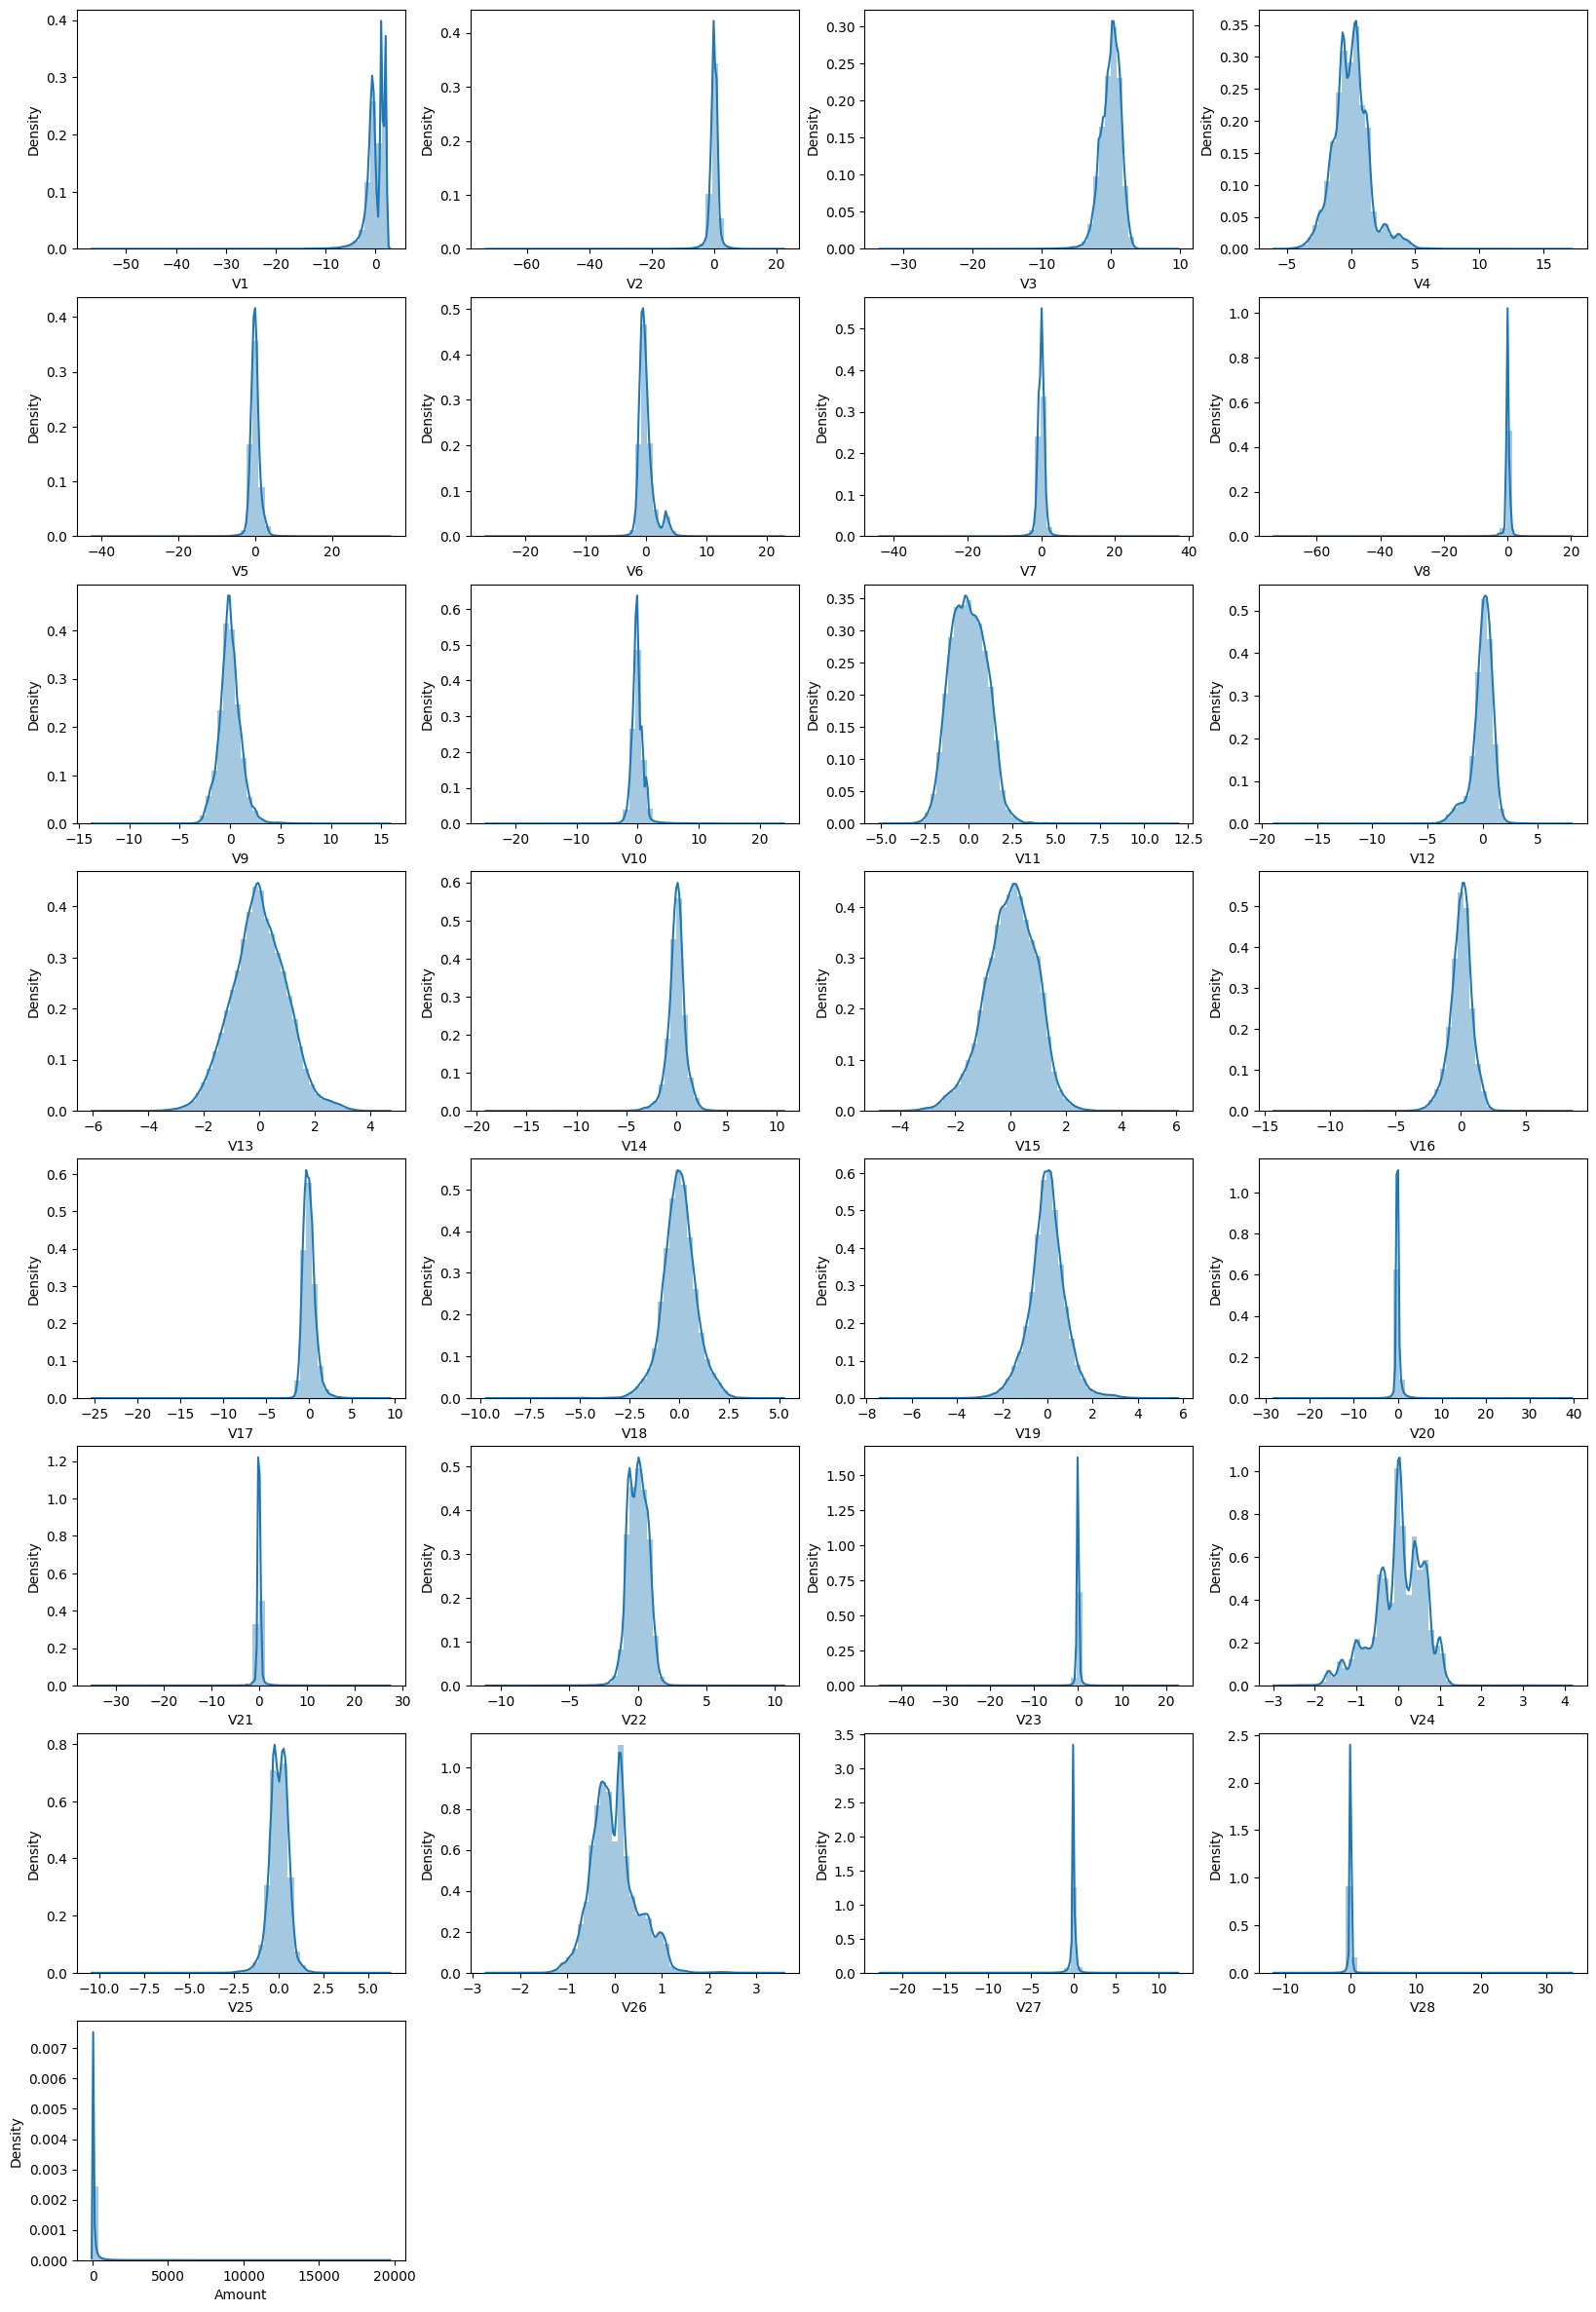

In [15]:
collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()




In [16]:
from sklearn.preprocessing import power_transform

X_train = power_transform(X_train,method='yeo-johnson')
X_test = power_transform(X_test,method='yeo-johnson')

In [17]:
cols = X.columns

X_train = pd.DataFrame(X_train)
X_train.columns = cols

X_test = pd.DataFrame(X_test)
X_test.columns = cols


C:\Users\jugaa\AppData\Local\Temp\ipykernel_17800\2598818929.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
C:\Users\jugaa\AppData\Local\Temp\ipykernel_17800\2598818929.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
C:\Users\j

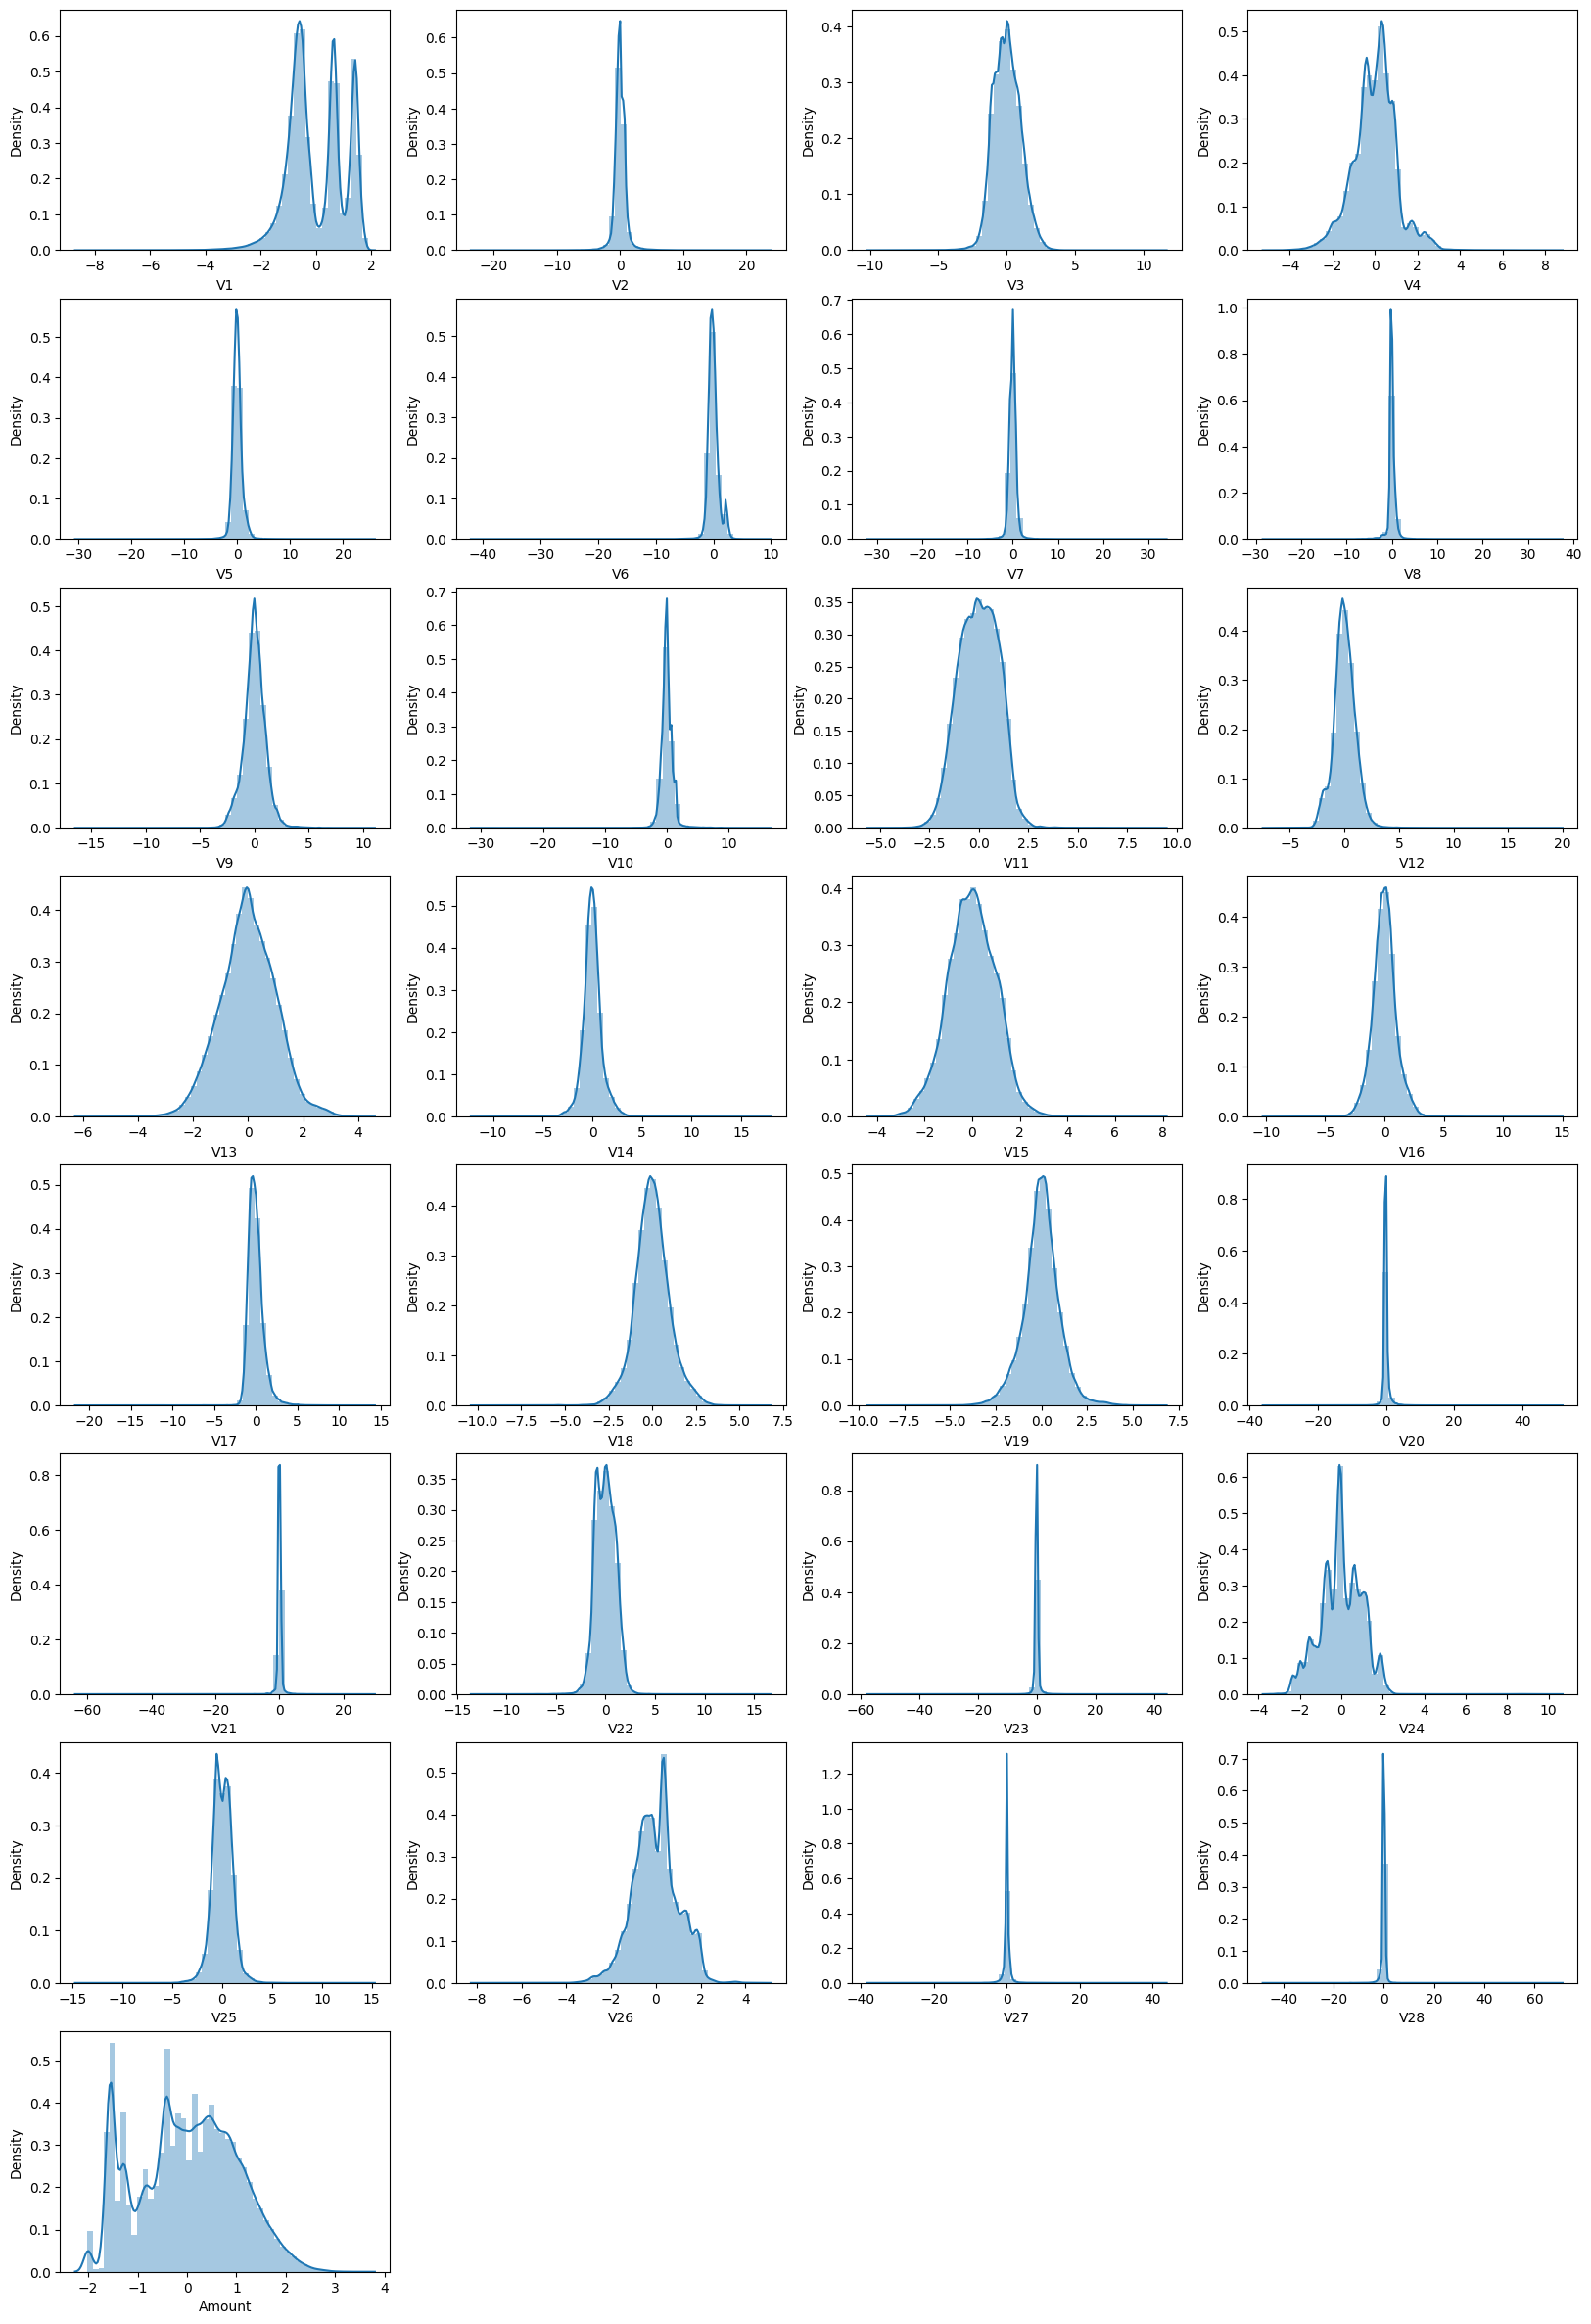

In [18]:
collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()



In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob)
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc


### Logistic Regression

In [20]:

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [21]:
num_C = [0.001,0.01,0.1,1,10,100]

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

C: 0.001
Coefficient of each feature: [[-0.06451213  0.04218053 -0.14822213  0.22596932  0.02600024 -0.03627853
  -0.06125985 -0.11775332 -0.10662233 -0.22864757  0.1860378  -0.23861573
  -0.03000615 -0.40490323 -0.00777475 -0.12925705 -0.11629859 -0.00915348
   0.00498774  0.00924884  0.04493003  0.02312334 -0.02289268 -0.02536797
  -0.00710216  0.00834398 -0.00666134  0.00623157 -0.00251388]]
Training accuracy: 0.9990344313019817
Test accuracy: 0.9989993328885924

C: 0.01
Coefficient of each feature: [[-0.15625815 -0.05624617 -0.24465224  0.53507211  0.01153114  0.04080861
  -0.13331613 -0.21239056 -0.1611028  -0.2411532   0.21234165 -0.44551451
  -0.06642478 -0.65124433 -0.07481625 -0.20383027 -0.02443342  0.03767547
  -0.03619418 -0.01498614  0.07012199  0.08720016 -0.0615613  -0.01596627
   0.00992078  0.01162565 -0.08214594 -0.02016426  0.03893558]]
Training accuracy: 0.9992275450415853
Test accuracy: 0.9992099996488887

C: 0.1
Coefficient of each feature: [[-0.20050467 -0.146658

In [22]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters:",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)


tuned hpyerparameters: {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803913347266079


*   Best parameters = {'C': 0.01, 'penalty': 'l2'}




AUC: 0.98


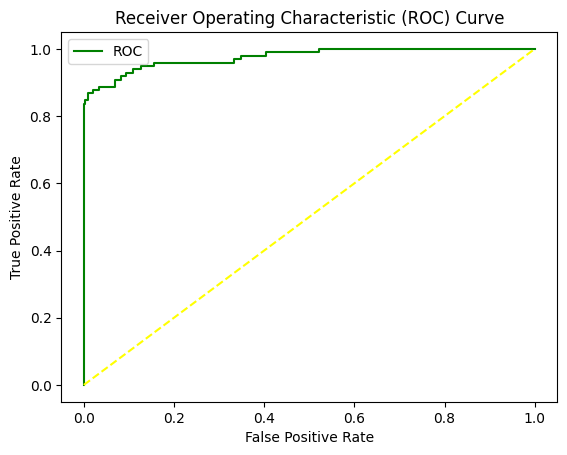

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.62      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



0.9755302303814041

In [23]:
lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)



*   The AUC score is 0.98 but low recall 0.62.



In [24]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error


k_range = np.arange(1, 20, 2)
scores = []
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [25]:
for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

mse = [1-x for x in scores]


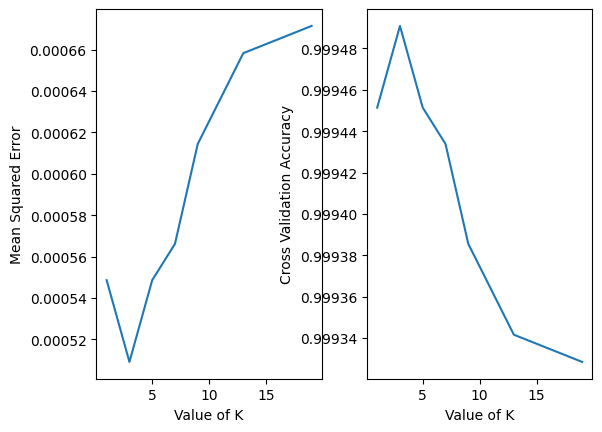

In [26]:
plt.subplot(121)
sns.lineplot(x=k_range, y=mse, markers=True, dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range, y=scores, markers=True, dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()





*   So the best K value is 3 for KNN





AUC: 0.90


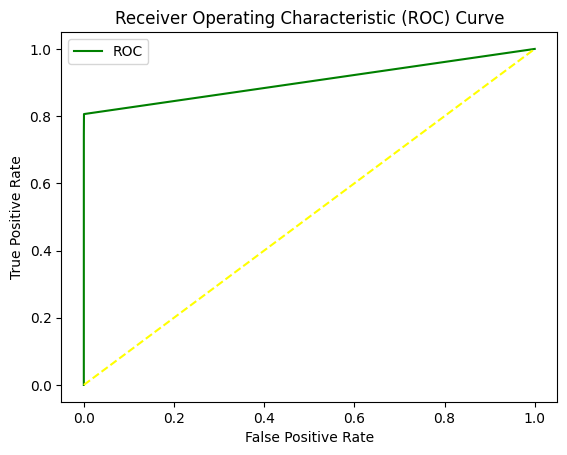

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.902998417994097

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_clf = knn.fit(X_train,y_train)
clf_score(knn_clf)

* The KNN model gives AUC of 0.90 and f1-score is 0.84.

In [28]:
from sklearn import tree
from pprint import pprint

In [29]:
depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9990827097368825, 0.9992802124251137, 0.999297768219623, 0.9993723803462882, 0.9994689372160899, 0.9994864930105992, 0.9994469924729531, 0.9994162698325615, 0.9994733261647173, 0.999407491935307, 0.9993987140380522, 0.9993723803462882, 0.999372380346288, 0.9992889903223683, 0.9992802124251134, 0.999284601373741, 0.9992407118874673, 0.9992056002984485, 0.9992056002984485]


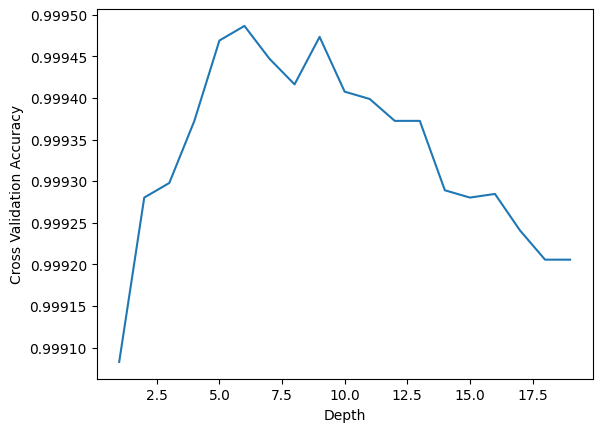

In [30]:
sns.lineplot(x=dep_rng,y=depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()



* Best value for depth is 6




AUC: 0.88


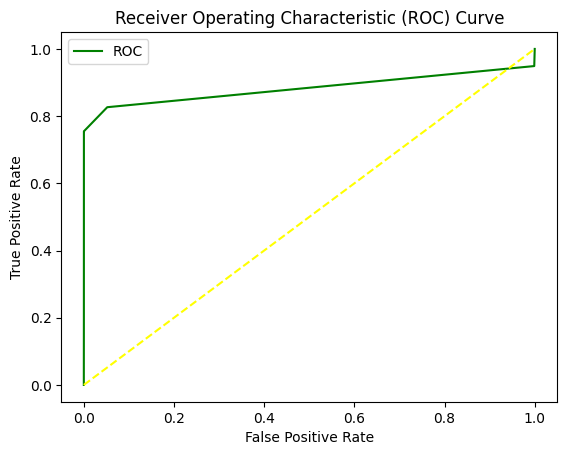

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



0.8826954107473041

In [31]:
dt = tree.DecisionTreeClassifier(max_depth = 6)
dt_clf = dt.fit(X_train,y_train)

clf_score(dt_clf)

* The AUC score for decision tree is only 0.89, the f1-score is lower than KNN.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [33]:

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)



tuned hpyerparameters : {'max_depth': 9, 'n_estimators': 50}
accuracy : 0.9753832275813569


* So the best parameters for Random forest  {'max_depth': 9, 'n_estimators': 30}.

AUC: 0.96


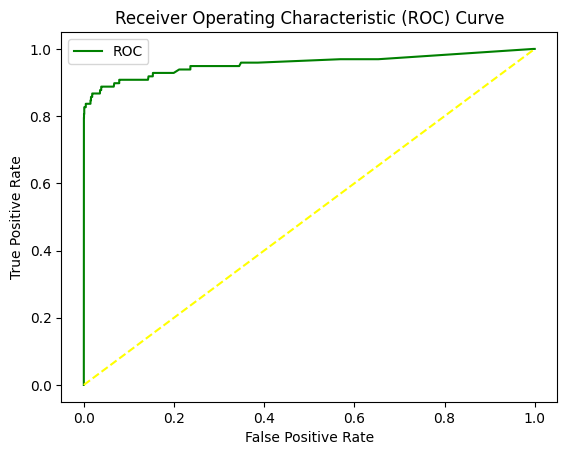

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.71      0.82        98

    accuracy                           1.00     56962
   macro avg       0.99      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9560320435152113

In [34]:
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_clf = rf.fit(X_train,y_train)

clf_score(RFC_clf)

* The AUC is 0.98, recall is 0.72

In [35]:
from xgboost import XGBClassifier
from scipy import stats

In [36]:
xgbst = XGBClassifier()

param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)



tuned hpyerparameters : {'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 130}
accuracy : 0.9843504936661525


* The best parameters for XGboost is 
 {'max_depth': 5, 'min_child_weight': 3 'n_estimators': 150}
 AUC : 0.9850958755280601

AUC: 0.98


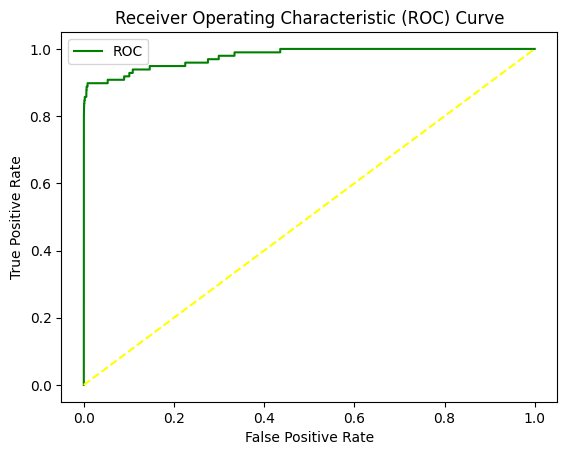

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9785786782355035

In [37]:
xgbst = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=3)

xgb_clf = xgbst.fit(X_train,y_train)

clf_score(xgb_clf)

* The AUC is 0.98 with f1-score of 0.83 which is good.

##### Out of the models KNN performed the best with AUC of 0.90 and f1-score 0.84

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [39]:
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_sm))
print(X_sm.shape)
print(y_sm.shape)

Resampled dataset shape Counter({0: 227451, 1: 227451})
(454902, 29)
(454902,)


In [40]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

In [41]:
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_ada))
print(X_ada.shape)
print(y_ada.shape)

Resampled dataset shape Counter({1: 227460, 0: 227451})
(454911, 29)
(454911,)


AUC: 0.98


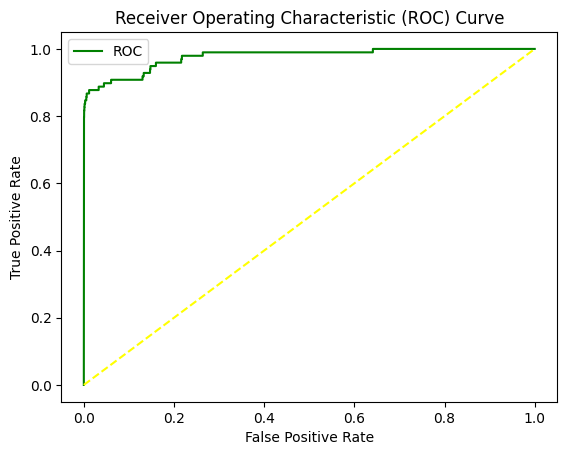

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.88      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



0.9771953203059501

In [42]:
lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_sm = lsr_best.fit(X_sm,y_sm)

clf_score(lsr_sm)

AUC: 0.97


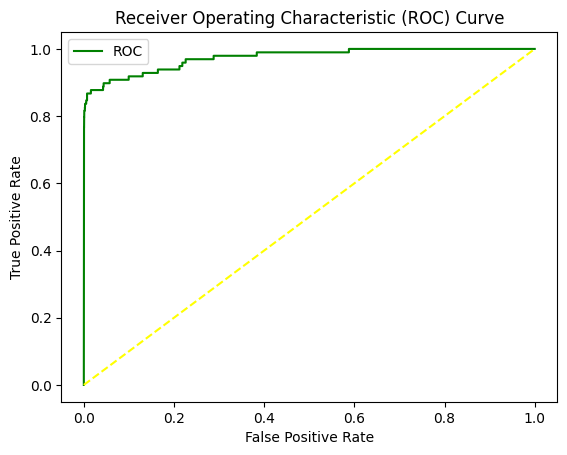

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



0.9744059043848265

In [43]:
lsr_ada = lsr_best.fit(X_ada,y_ada)

clf_score(lsr_ada)

- AUC & Recall both are better on SMOTE. 
- But the f1-score is extremely low. Model is overfitting.

AUC: 0.92


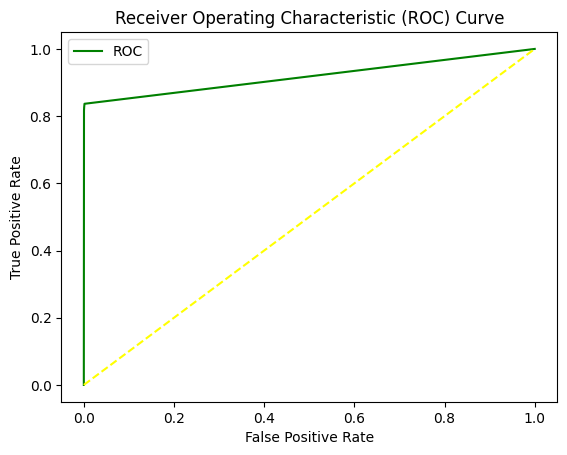

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.83      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.9180683880192482

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_sm = knn.fit(X_sm,y_sm)

clf_score(knn_sm)

AUC: 0.92


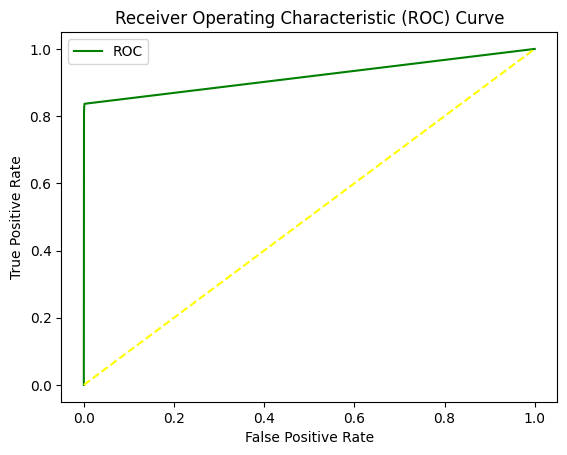

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.83      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.9180629148817658

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_ada = knn.fit(X_ada,y_ada)

clf_score(knn_ada)

- Same on both SMOTE and ADASYN.


AUC: 0.92


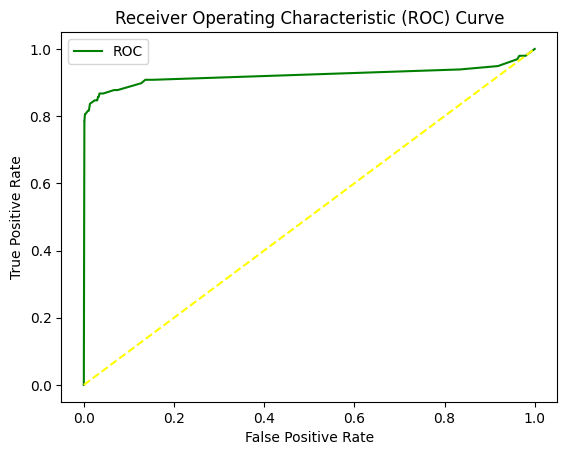

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.86      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.97      0.98     56962



0.9211117216301264

In [46]:
dt = tree.DecisionTreeClassifier(max_depth = 6)
dt_sm = dt.fit(X_sm,y_sm)

clf_score(dt_sm)

AUC: 0.92


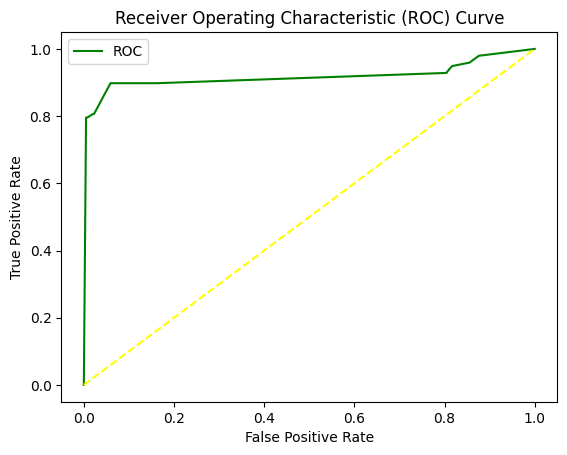

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.90      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.91      0.95     56962



0.917449744036613

In [47]:
dt = tree.DecisionTreeClassifier(max_depth = 6)
dt_ada = dt.fit(X_ada,y_ada)

clf_score(dt_ada)


* The Precision is extremely low in both, resulting in low f1-score. So the model is not good enough.

AUC: 0.98


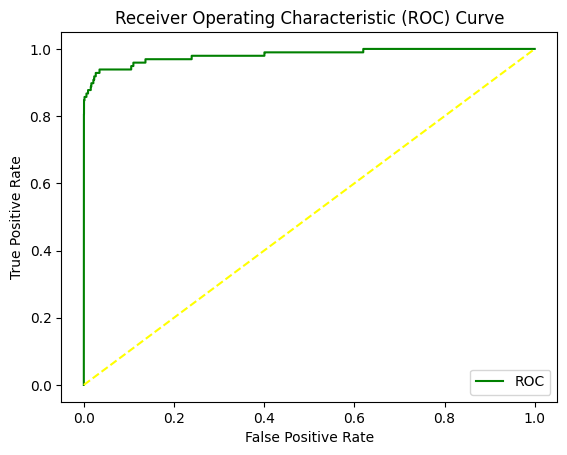

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.86      0.54        98

    accuracy                           1.00     56962
   macro avg       0.70      0.93      0.77     56962
weighted avg       1.00      1.00      1.00     56962



0.9819350573656588

In [48]:
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_sm = rf.fit(X_sm,y_sm)

clf_score(RFC_sm)

AUC: 0.97


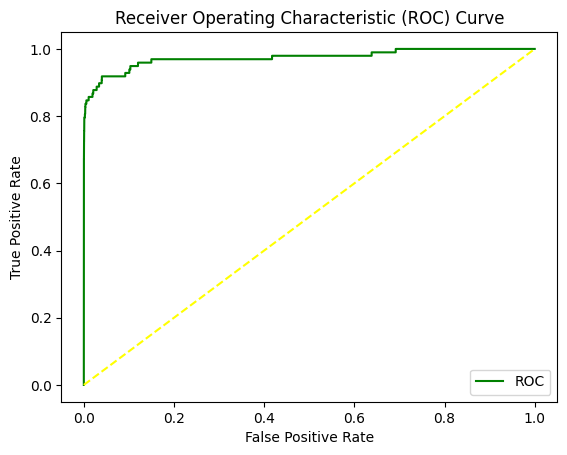

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.87      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



0.9741334139170581

In [49]:
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_ada = rf.fit(X_ada,y_ada)

clf_score(RFC_ada)

- Random Forest performs better on SMOTE.
- Low f1-score so the model is not good enough.

In [50]:
X_sm = pd.DataFrame(X_sm)
X_sm.columns = cols

X_ada = pd.DataFrame(X_ada)
X_ada.columns = cols

AUC: 0.98


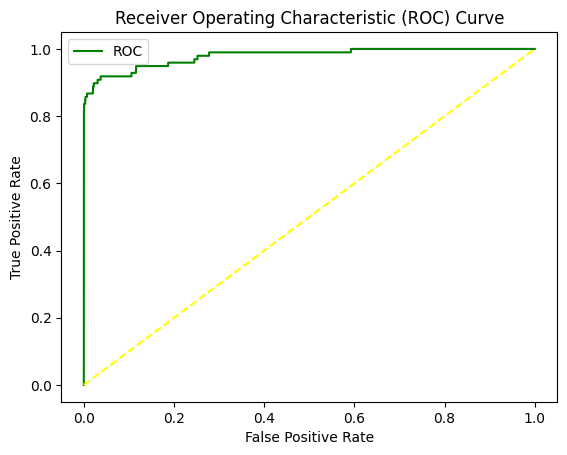

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.82      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



0.9792071020867548

In [51]:
xgbst = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=3)

xgb_sm = xgbst.fit(X_sm,y_sm)

clf_score(xgb_sm)

AUC: 0.98


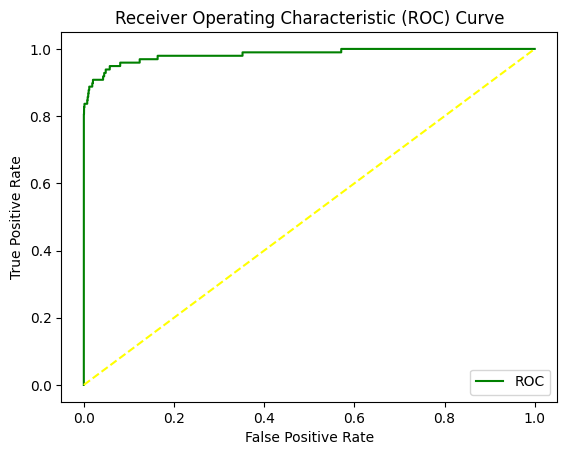

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.83      0.76        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



0.9839206398654003

In [52]:
xgbst = XGBClassifier(n_estimators=150,max_depth=5,min_child_weight=3)

xgb_ada = xgbst.fit(X_ada,y_ada)

clf_score(xgb_ada)

- AUC is similar in both resampled data scenarios. 

##### So the XGBoost model with SMOTE oversampling is our final model.